# **PREDICTIVE MODELLING**



Predictive modeling is a process used in data science to predict outcomes based on historical data. It involves building mathematical models that capture patterns in the data and using these models to make predictions on new data. Predictive modeling finds applications in various fields including finance, healthcare, marketing, and more.

#### Steps in Predictive Modeling:

1. **Problem Definition**: Clearly define the problem you want to solve and determine the outcome variable (the variable you want to predict).

2. **Data Collection**: Gather relevant data from various sources. This could include structured data from databases, unstructured data from text documents, or data from APIs.

3. **Data Preprocessing**: Clean the data by handling missing values, outliers, and encoding categorical variables. This step also involves scaling or normalizing numerical features.

4. **Feature Engineering**: Create new features from existing ones or transform features to better represent the underlying patterns in the data.

5. **Model Selection**: Choose the appropriate predictive model based on the problem at hand and the characteristics of the data. Common models include linear regression, decision trees, random forests, support vector machines, and neural networks.

6. **Model Training**: Split the data into training and testing sets. Train the chosen model on the training data.

7. **Model Evaluation**: Evaluate the performance of the model on the testing data using appropriate evaluation metrics such as accuracy, precision, recall, or mean squared error.

8. **Model Tuning**: Fine-tune the model hyperparameters to improve its performance. This may involve techniques like grid search or random search.

9. **Deployment**: Once satisfied with the model performance, deploy it into production where it can make predictions on new, unseen data.



### **Regression with StatsModels**

StatsModels is a Python library for estimating statistical models and conducting statistical tests. It provides classes and functions for various statistical models including linear regression, generalized linear models, time series analysis, and more. Here's how you can perform linear regression using StatsModels:



#### OLS stands for "Ordinary Least Squares." It is a method for estimating the parameters in a linear regression model by minimizing the sum of the squared differences between the observed and predicted values of the dependent variable

#### **Evaluation Metrics**
1. **Mean Squared Error (MSE)**: MSE is a measure of the average squared difference between the actual and predicted values in a regression problem. It's calculated as the average of the squared differences between the predicted and actual values.

   MSE = (1/n) * Σ square(actual – forecast)

   Where:
   - ( n ) is the number of observations.
   - (actual) is the actual value for observation.
   - (forecast) is the predicted value for observation.

2. **Root Mean Squared Error (RMSE)**: RMSE is the square root of the MSE. It's a measure of the average magnitude of the errors between the predicted and actual values, with the same scale as the target variable.

   RMSE = sqrt(MSE)

3. **Mean Absolute Error (MAE)**: MAE is a measure of the average absolute difference between the actual and predicted values. It's less sensitive to outliers compared to MSE because it doesn't square the errors.

   MAE = (1/n) * Σ abs(actual – forecast)

   Where:
   - ( n ) is the number of observations.
   - (actual ) is the actual value for observation.
   - ( forecast) is the predicted value for observation.

These metrics are commonly used to evaluate the performance of regression models. Lower values of MSE, RMSE, and MAE indicate better model performance,

### **Data To Be Used**

1. load_diabetes from sklearn, target : 'DiseaseProgression'
2. advertising : https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv, feature : 'TV' , target : 'Sales'
3. Concrete_Data , feature : 'Cement (component 1)(kg in a m^3 mixture)', target : 'Concrete compressive strength(MPa, megapascals) '

**1. load_diabetes from sklearn, target : 'DiseaseProgression'**

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
#load the data
data = load_diabetes()

In [ ]:
#Convert the data to dataframe
df = pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
# add the target feature to the dataframe
df['DiseaseProgression'] = data.target

In [ ]:
#View the first five rows of the data
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
#Input Variables (features)
X = df[data.feature_names]

In [ ]:
#add a constant(intercept) to X
X = sm.add_constant(X)

In [ ]:
#Target Variable
y = df['DiseaseProgression']

In [ ]:
#split the dataset
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [ ]:
#Training the Model (Learning Process)
model = sm.OLS(y_train,X_train).fit()

In [ ]:
#calculate mean_squared_error
mse = mean_squared_error(y_test,model.predict(X_test))
#calculate mean_absolute_error
mae = mean_absolute_error(y_test,model.predict(X_test))
#root mean square error
rmse = np.sqrt(mse)


In [ ]:
#Display the values of mse,mae and rmse
print('Mean Square Error: ', mse)
print('Mean Absolute Error: ', mae)
print('root mean square error: ', rmse)

Mean Square Error:  3424.2593342986793
Mean Absolute Error:  46.1735850037045
root mean square error:  58.51717127731551


In [ ]:
#import r2_score
from sklearn.metrics import r2_score
r_score = r2_score(y_test,model.predict(X_test))

In [ ]:
#display the value of r2_score
print(r_score)

0.33223321731062083


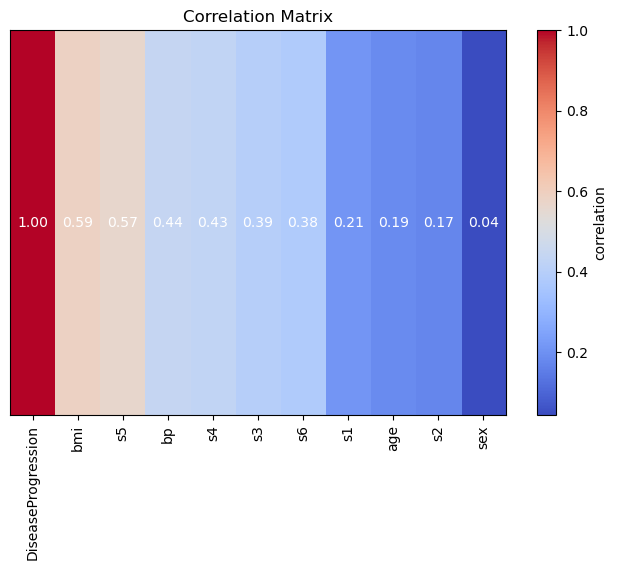

In [ ]:
#Visualizing the features that correlate with the target variable (feature)
corr_matrix = df.corr()['DiseaseProgression'].abs().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.imshow(np.array([corr_matrix.values]),cmap='coolwarm',aspect='auto')
plt.colorbar(label="correlation")
plt.title('Correlation Matrix')
plt.xticks(range(len(corr_matrix)),corr_matrix.index,rotation = 90)
plt.yticks([])

for i in range(len(corr_matrix)):
    plt.text(i,0,f"{corr_matrix.iloc[i]:.2f}",ha='center',va='center',color='white')

plt.show()


In [ ]:
# Getting the top features (the key determinants in the model's prediction) base on a threshold
top_features = corr_matrix[corr_matrix > 0.5].index
top_features = top_features.drop('DiseaseProgression')
print(top_features)

Index(['bmi', 's5'], dtype='object')


In [ ]:
top_features_ = corr_matrix[corr_matrix > 0.5]
top_features_

DiseaseProgression    1.000000
bmi                   0.586450
s5                    0.565883
Name: DiseaseProgression, dtype: float64

### Retraining the Model

In [ ]:
# Selecting and utilizing the top features as input data
X = df[top_features]
X = sm.add_constant(X)

In [ ]:
# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Training the model (Learning Process)
model = sm.OLS(y_train,X_train).fit()

In [ ]:
#calculate mean_squared_error
mse = mean_squared_error(y_test,model.predict(X_test))
#calculate mean_absolute_error
mae = mean_absolute_error(y_test,model.predict(X_test))
#root mean square error
rmse = np.sqrt(mse)


Mean Square Error:  3424.2593342986793
Mean Absolute Error:  46.1735850037045
root mean square error:  58.51717127731551

In [ ]:
# Display the values of mse, mae and rmse
print('Mean Square Error: ', mse)
print('Mean Absolute Error: ', mae)
print('root mean square error: ', rmse)


Mean Square Error:  2901.8369415567036
Mean Absolute Error:  43.98824346868295
root mean square error:  53.8687009455092


In [ ]:
# Applying the r2_score metric
r_score = r2_score(y_test,model.predict(X_test))

In [ ]:
# Display the value of the r2_score
print(r_score)

0.4522925957397932


In [ ]:
# Saving the predictions made by the model
prediction = model.predict(X_test)
prediction

287    165.473030
211    166.142365
72     196.320249
321    245.311376
73     134.089654
          ...    
255    101.983721
90      92.480402
57      73.846928
391     50.570101
24     163.421151
Length: 89, dtype: float64

In [ ]:
y_test

287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
       ...  
255    153.0
90      98.0
57      37.0
391     63.0
24     184.0
Name: DiseaseProgression, Length: 89, dtype: float64

In [ ]:
# Converting the actual target values to dataframe
df = pd.DataFrame(data=y_test.values,columns=['Actual'])

In [ ]:
# adding the predicted values to the dataframe and rounding off the values to 2 decimal place
df['Predicted'] = np.round(prediction.values,2)

In [ ]:
# view the first five row of the dataframe
df.head()

,Actual,Predicted
0,219.0,165.47
1,70.0,166.14
2,202.0,196.32
3,230.0,245.31
4,111.0,134.09


In [ ]:
# Exporting to csv file
df.to_csv('predict.csv',index=False)

In [ ]:
# Exporting to excel file
df.to_excel('Model Prediction.xlsx',index=False)